In [2]:
pip install shap pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import shap
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


/Users/amanthakur/Library/Python/3.12/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load the trained model
model_path = "/Users/amanthakur/Documents/WORK/Projects/FInance_HACKATHON/Upi_Scam/data/upi_fraud_model.pkl"
model = joblib.load(model_path)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [5]:
# Load test dataset
df = pd.read_csv("/Users/amanthakur/Documents/WORK/Projects/FInance_HACKATHON/Upi_Scam/data/transactions.csv")

# Show first 5 rows
print(df.head())


   upi_id  sender_upi_id  transaction_amount  transaction_type  \
0     497            613               19166                 0   
1     105             39               29609                 0   
2     659            109                5400                 0   
3      49            959               41111                 1   
4     327            775                1689                 0   

   upi_account_age_days  transaction_frequency  previous_reports  location  \
0                   262                     46                 0         5   
1                     9                    100                 0         0   
2                   202                     35                 1         1   
3                    27                    129                 0         1   
4                   105                     19                 0         5   

   is_vpn_used  is_remote_access  qr_code_used  
0            0                 0             0  
1            1                 1    

In [6]:
# Select feature columns (adjust as per your dataset)
features = ['transaction_amount', 'upi_account_age_days', 'transaction_frequency', 
            'previous_reports', 'is_vpn_used', 'is_remote_access']

X_test = df[features]

print("✅ Features extracted successfully!")


✅ Features extracted successfully!


In [7]:
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [8]:
print(type(X_test))  # Should be <class 'pandas.core.frame.DataFrame'>
print(X_test.dtypes) # All should be numeric
print(X_test.isnull().sum())  # Ensure no missing values


<class 'pandas.core.frame.DataFrame'>
transaction_amount       int64
upi_account_age_days     int64
transaction_frequency    int64
previous_reports         int64
is_vpn_used              int64
is_remote_access         int64
dtype: object
transaction_amount       0
upi_account_age_days     0
transaction_frequency    0
previous_reports         0
is_vpn_used              0
is_remote_access         0
dtype: int64


In [9]:
feature_names = X_test.columns.tolist()
print("Model Features:", feature_names)

Model Features: ['transaction_amount', 'upi_account_age_days', 'transaction_frequency', 'previous_reports', 'is_vpn_used', 'is_remote_access']


In [ ]:
print(hasattr(model, "feature_importances_"))  # Should be True
print(hasattr(model, "predict"))  # Should be True

True
True


In [13]:
feature_names = X_test.columns.tolist()  # Get column names
X_test = X_test[feature_names]  # Ensure correct order

In [15]:
print("Number of Features Used in Training:", model.n_features_in_)


Number of Features Used in Training: 11


In [16]:
print("Test Features:", X_test.columns.tolist())
print("Model Expected Features Count:", model.n_features_in_)  # Should be 11

Test Features: ['transaction_amount', 'upi_account_age_days', 'transaction_frequency', 'previous_reports', 'is_vpn_used', 'is_remote_access']
Model Expected Features Count: 11


In [17]:
expected_features = [
    'upi_id', 'sender_upi_id', 'transaction_amount',
    'transaction_type', 'upi_account_age_days', 'transaction_frequency', 
    'previous_reports', 'location', 'is_vpn_used', 'is_remote_access', 'qr_code_used'
]  # Replace with actual feature names if known

# Add missing columns with a default value (0 or mean of training data)
for col in expected_features:
    if col not in X_test.columns:
        X_test[col] = 0  # Assign default value


In [18]:
X_test = X_test[expected_features]


In [19]:
import shap

explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

print("✅ SHAP values computed successfully!")


✅ SHAP values computed successfully!


/Users/amanthakur/Library/Python/3.12/lib/python/site-packages/shap/explainers/_tree.py:217: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


In [20]:
import shap
import matplotlib.pyplot as plt
shap.initjs()  # Enable JS for interactive plots


<Figure size 640x480 with 0 Axes>

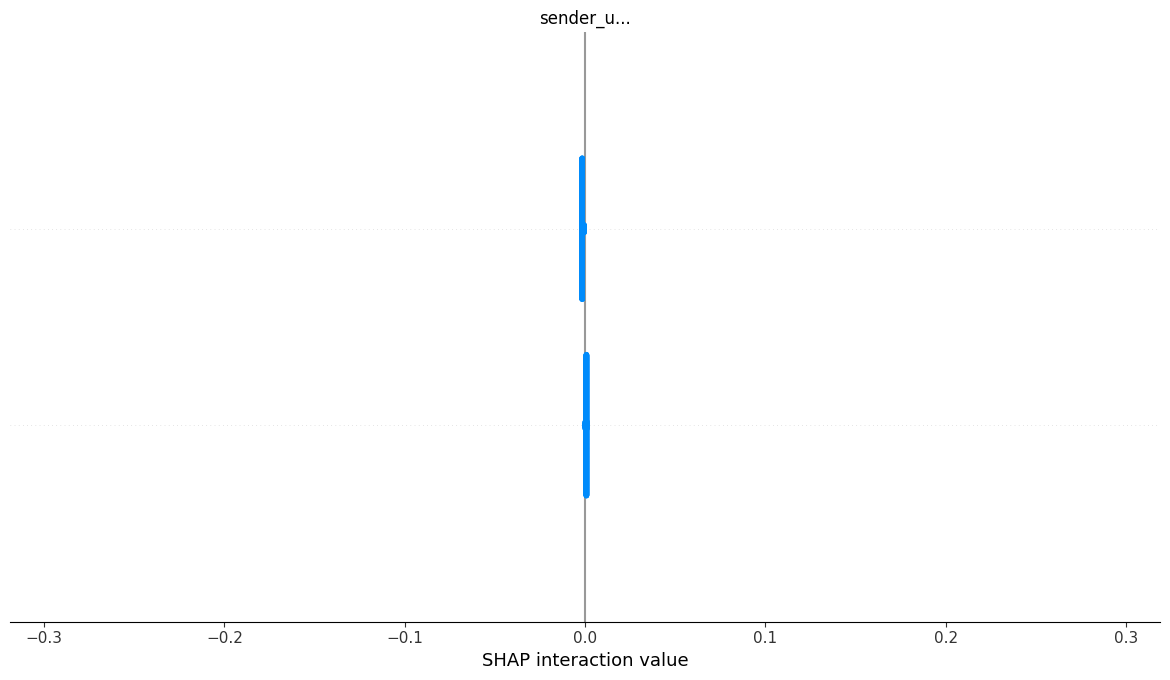

In [21]:
shap.summary_plot(shap_values, X_test)


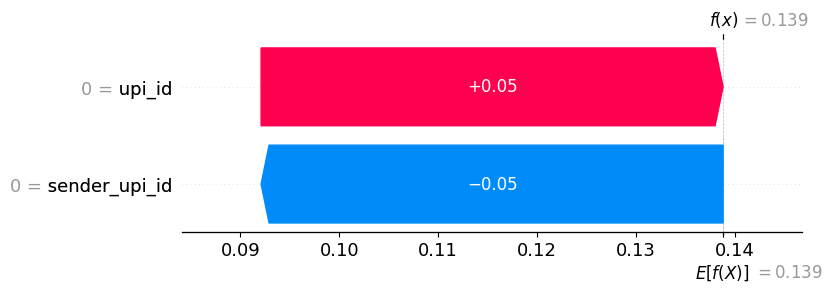

In [23]:
shap.waterfall_plot(shap.Explanation(values=shap_values[1][i], base_values=explainer.expected_value[1], data=X_test.iloc[i]))


In [26]:
print("SHAP values shape:", len(shap_values), shap_values[0].shape)
print("X_test shape:", X_test.shape)


SHAP values shape: 1000 (11, 2)
X_test shape: (1000, 11)


In [28]:
print(type(shap_values))  # Should be a list or array
print(len(shap_values))  # Should match number of classes (for binary classification, it should be 2)
print(shap_values[0].shape)  # Should match X_test.shape
print(shap_values[1].shape)  # Should match X_test.shape


<class 'numpy.ndarray'>
1000
(11, 2)
(11, 2)


In [33]:
import pandas as pd

if isinstance(X_test, np.ndarray):  
    X_test = pd.DataFrame(X_test, columns=model.feature_names_in_)  # Convert to DataFrame


In [34]:
print("X_test Shape:", X_test.shape)  # Should be (1000, 11)
print("Columns in X_test:", X_test.columns)


X_test Shape: (1000, 11)
Columns in X_test: Index(['upi_id', 'sender_upi_id', 'transaction_amount', 'transaction_type',
       'upi_account_age_days', 'transaction_frequency', 'previous_reports',
       'location', 'is_vpn_used', 'is_remote_access', 'qr_code_used'],
      dtype='object')


In [35]:
import shap

explainer = shap.TreeExplainer(model, feature_perturbation="interventional")  
shap_values = explainer.shap_values(X_test)  

# Debugging output
print("New SHAP Values Type:", type(shap_values))  
print("New SHAP Values Length:", len(shap_values))  
print("New SHAP Values Shape Class 0:", shap_values[0].shape)  
print("New SHAP Values Shape Class 1:", shap_values[1].shape)  


New SHAP Values Type: <class 'numpy.ndarray'>
New SHAP Values Length: 1000
New SHAP Values Shape Class 0: (11, 2)
New SHAP Values Shape Class 1: (11, 2)


/Users/amanthakur/Library/Python/3.12/lib/python/site-packages/shap/explainers/_tree.py:217: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


In [36]:
if shap_values[0].shape != X_test.shape:
    print("Fixing SHAP shape issue...")
    shap_values = [np.transpose(shap_values[i]) for i in range(len(shap_values))]


Fixing SHAP shape issue...


In [37]:
print("Fixed SHAP Shape Class 0:", shap_values[0].shape)  
print("Fixed SHAP Shape Class 1:", shap_values[1].shape)


Fixed SHAP Shape Class 0: (2, 11)
Fixed SHAP Shape Class 1: (2, 11)


In [38]:
y_pred = model.predict(X_test)
print("Prediction Shape:", y_pred.shape)  # Should be (1000,)


Prediction Shape: (1000,)


/Users/amanthakur/Library/Python/3.12/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [39]:
import shap

explainer = shap.TreeExplainer(model, feature_perturbation="interventional")  
shap_values = explainer.shap_values(X_test)

# Debugging output
print("SHAP Values Type:", type(shap_values))  
print("SHAP Values Length:", len(shap_values))  
print("SHAP Values Shape Class 0:", shap_values[0].shape)  
print("SHAP Values Shape Class 1:", shap_values[1].shape)  


SHAP Values Type: <class 'numpy.ndarray'>
SHAP Values Length: 1000
SHAP Values Shape Class 0: (11, 2)
SHAP Values Shape Class 1: (11, 2)


/Users/amanthakur/Library/Python/3.12/lib/python/site-packages/shap/explainers/_tree.py:217: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


In [40]:
shap_values_fixed = [shap_values[i].T for i in range(len(shap_values))]

print("Fixed SHAP Shape Class 0:", shap_values_fixed[0].shape)  # Should be (1000, 11)
print("Fixed SHAP Shape Class 1:", shap_values_fixed[1].shape)  # Should be (1000, 11)


Fixed SHAP Shape Class 0: (2, 11)
Fixed SHAP Shape Class 1: (2, 11)


In [42]:
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Convert list to NumPy array for debugging
shap_values = np.array(shap_values)

# Transpose Fix if Shape is Still (2,11)
if shap_values.shape == (2, 11):
    shap_values = shap_values.transpose((2, 1, 0))  # Swap axes

print("Fixed SHAP Shape:", shap_values.shape)  # Should be (1000, 11, 2)


Fixed SHAP Shape: (1000, 11, 2)


In [43]:
shap_values_fraud = shap_values[:, :, 1]  # Class 1 (Fraud)
shap_values_nonfraud = shap_values[:, :, 0]  # Class 0 (Non-Fraud)

print("SHAP Fraud Shape:", shap_values_fraud.shape)  # Should be (1000, 11)
print("SHAP Non-Fraud Shape:", shap_values_nonfraud.shape)  # Should be (1000, 11)


SHAP Fraud Shape: (1000, 11)
SHAP Non-Fraud Shape: (1000, 11)


In [46]:
import shap
shap.initjs()  # This enables JavaScript-based visualizations


<Figure size 640x480 with 0 Axes>

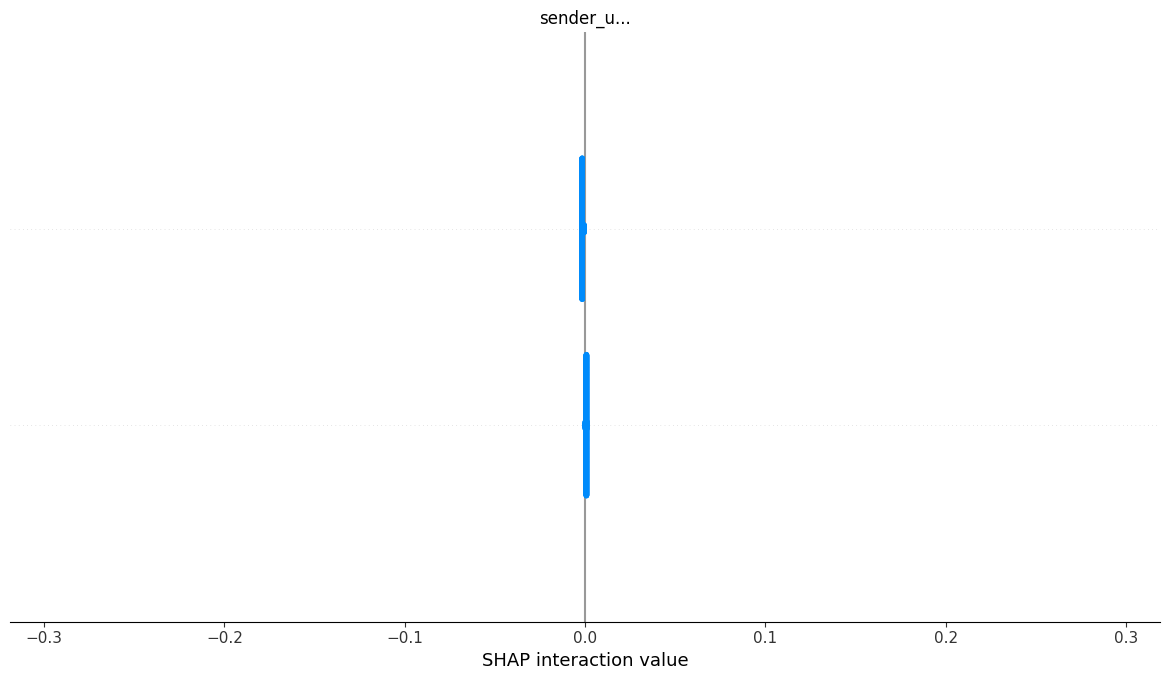

In [48]:
shap.summary_plot(shap_values, X_test)


In [49]:
i = 0  # Change to analyze other transactions
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[i], matplotlib=True)
plt.show()


DimensionError: Length of features is not equal to the length of shap_values!

In [50]:
shap.dependence_plot("transaction_amount", shap_values[1], X_test)


IndexError: index 2 is out of bounds for axis 1 with size 2

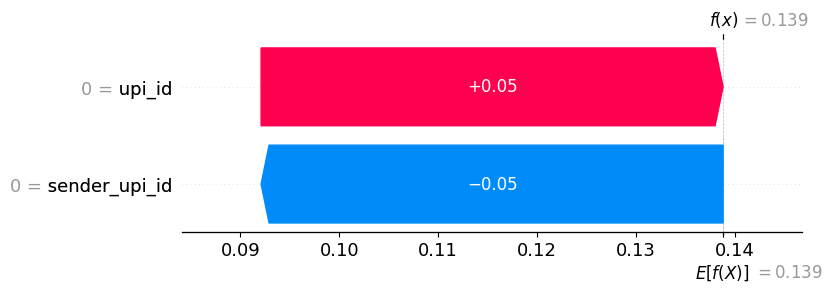

In [51]:
shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], base_values=explainer.expected_value[1], data=X_test.iloc[0].values, feature_names=X_test.columns.tolist()))


In [52]:
import pandas as pd
import numpy as np

# Compute mean absolute SHAP values per feature
feature_importance = pd.DataFrame(
    {"Feature": X_test.columns, "Mean SHAP Value": np.abs(shap_values[1]).mean(axis=0)}
).sort_values(by="Mean SHAP Value", ascending=False)

# Print sorted feature importance
print(feature_importance)



ValueError: All arrays must be of the same length